<a href="https://colab.research.google.com/github/alyawulan/-10222004_AlyaWulanRimayanti_SD/blob/main/10222004_AlyaWulanRimayanti_SD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_spam.csv', encoding='latin-1')

data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##Penjelasan Dataset yang digunakan
Kasus yang diambil adalah deteksi pesan spam(Spam Detection).  
Tujuan dari kasus ini adalah untuk mengklasifikasikan pesan teks (SMS atau email) ke dalam dua kategori utama:

Spam → pesan yang bersifat iklan, penipuan, atau tidak diinginkan.  
Ham → pesan normal atau bukan spam.

Model ini dibuat menggunakan algoritma Naive Bayes, yaitu salah satu metode Machine Learning yang sederhana namun efektif dalam melakukan klasifikasi teks.  
Dataset yang digunakan berisi kumpulan pesan (SMS/email) yang telah diberi label apakah pesan tersebut termasuk spam atau tidak.


In [6]:
# 3. Import library
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# 4. Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_spam.csv', encoding='latin-1')
data.head()

data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Understanding

In [8]:
# 5. Jumlah Baris Data
print("Jumlah baris data:", data.shape[0])
print("Jumlah kolom data:", data.shape[1])

print("\nNama kolom:", list(data.columns))


Jumlah baris data: 5572
Jumlah kolom data: 5

Nama kolom: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [9]:
# 6. Panjang Rata-rata Setiap Baris

data['panjang_pesan'] = data['v2'].astype(str).apply(len)

rata_rata = data['panjang_pesan'].mean()
print(f"Panjang rata-rata setiap pesan: {rata_rata:.2f} karakter")

data[['v1', 'v2', 'panjang_pesan']].sort_values(by='panjang_pesan', ascending=False).head()


Panjang rata-rata setiap pesan: 80.12 karakter


,v1,v2,panjang_pesan
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588


In [10]:
# 7. Cek Data Duplikasi

duplikat = data.duplicated().sum()
print("Jumlah data duplikat:", duplikat)

if duplikat > 0:
    display(data[data.duplicated()])


Jumlah data duplikat: 403


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,panjang_pesan
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN,156
222,ham,"Sorry, I'll call later",NaN,NaN,NaN,22
325,ham,No calls..messages..missed calls,NaN,NaN,NaN,32
...,...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN,153
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN,329
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN,26
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN,27


In [11]:
# 8. Cek Data Kosong

print("Jumlah nilai kosong tiap kolom:\n")
print(data.isnull().sum())

persentase_kosong = (data.isnull().sum() / len(data)) * 100
print("\nPersentase nilai kosong tiap kolom (%):\n")
print(persentase_kosong)


Jumlah nilai kosong tiap kolom:

v1                  0
v2                  0
Unnamed: 2       5522
Unnamed: 3       5560
Unnamed: 4       5566
panjang_pesan       0
dtype: int64

Persentase nilai kosong tiap kolom (%):

v1                0.000000
v2                0.000000
Unnamed: 2       99.102656
Unnamed: 3       99.784637
Unnamed: 4       99.892319
panjang_pesan     0.000000
dtype: float64


/tmp/ipython-input-2056153309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1', data=data, palette='Set2')


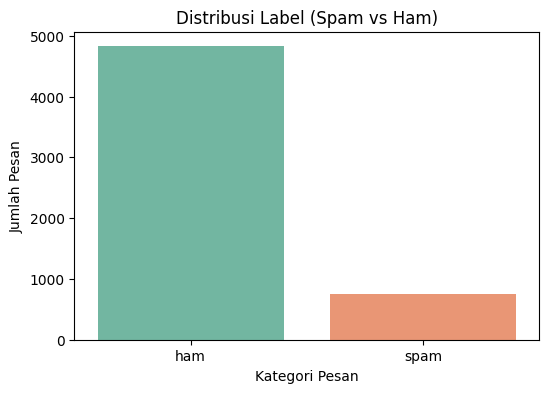

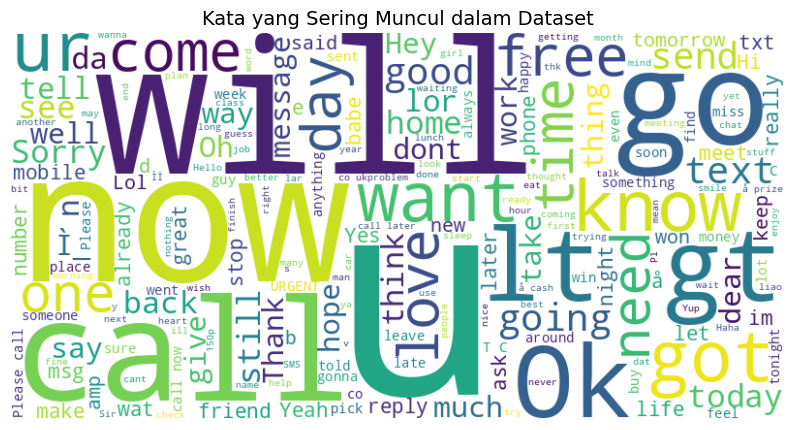

In [12]:
# 9. Distribusi Data dan Visualisasi Word Cloud

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.figure(figsize=(6,4))
sns.countplot(x='v1', data=data, palette='Set2')
plt.title('Distribusi Label (Spam vs Ham)')
plt.xlabel('Kategori Pesan')
plt.ylabel('Jumlah Pesan')
plt.show()

teks_gabungan = ' '.join(data['v2'].astype(str))

plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(teks_gabungan)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata yang Sering Muncul dalam Dataset', fontsize=14)
plt.show()


## Data Text Processing

In [13]:
# 10. Tokenisasi

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

data['tokens'] = data['v2'].astype(str).apply(word_tokenize)

data[['v2', 'tokens']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,v2,tokens
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [14]:
# 11. Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

data['lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x])

data[['v2', 'lemmatized']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,v2,lemmatized
0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,Ok lar... Joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, go, to, usf, ,, h..."


In [15]:
# 12. Stemming

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data['stemmed'] = data['tokens'].apply(lambda x: [stemmer.stem(word.lower()) for word in x])

data[['v2', 'stemmed']].head()


,v2,stemmed
0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazi, .., avail..."
1,Ok lar... Joking wif u oni...,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, earli, hor, ..., u, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goe, to, usf, ,, ..."


In [16]:
# 13. Stopword Removal

import string
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    cleaned = []
    for word in tokens:
        word = word.lower()
        if word not in stop_words and word.isalpha():
            cleaned.append(word)
    return cleaned

data['clean_tokens'] = data['lemmatized'].apply(clean_tokens)

data['clean_text'] = data['clean_tokens'].apply(lambda x: ' '.join(x))

data[['v2', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,v2,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [17]:
# 14. Text Normalisasi
def normalize_text(text):
    text = text.lower()
    text = text.replace("u", "you")
    text = text.replace("ur", "your")
    text = text.replace("4u", "for you")
    return text

data['normalized_text'] = data['clean_text'].apply(normalize_text)

data[['clean_text', 'normalized_text']].head()


,clean_text,normalized_text
0,go jurong point crazy available bugis n great ...,go jyoyourong point crazy available byougis n ...
1,ok lar joking wif u oni,ok lar joking wif you oni
2,free entry wkly comp win fa cup final tkts may...,free entry wkly comp win fa cyoup final tkts m...
3,u dun say early hor u c already say,you dyoun say early hor you c already say
4,nah think go usf life around though,nah think go yousf life aroyound thoyough


In [18]:
# 16. Labeling Data (konversi kategori ke numerik)

data['label'] = data['v1'].map({'spam': 1, 'ham': 0})

data[['v1', 'label']].head()


,v1,label
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


In [19]:
# 17. Text Vektorisasi (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['normalized_text'])
y = data['label']

print("Jumlah fitur TF-IDF:", len(tfidf.get_feature_names_out()))


Jumlah fitur TF-IDF: 3000


In [20]:
# 18. Data Splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 4457
Jumlah data testing: 1115


# Data Modeling
 Model yang Dipilih: Naive Bayes

Pada penelitian ini digunakan model Machine Learning dengan algoritma Naive Bayes, tepatnya tipe *Multinomial Naive Bayes*.  
Alasan pemilihan algoritma ini adalah karena:

1. Cocok untuk data teks
   Naive Bayes sangat efektif untuk masalah *text classification* seperti deteksi spam, karena bekerja berdasarkan frekuensi kata yang muncul pada setiap kategori.

2. Efisien dan cepat
   Algoritma ini memiliki waktu pelatihan yang singkat dan tidak memerlukan sumber daya tinggi, sehingga cocok untuk dataset besar seperti pesan email atau SMS.

3. Hasil akurasi tinggi
   Walaupun sederhana, model ini mampu memberikan akurasi yang baik dalam mendeteksi pesan spam dibandingkan model yang lebih kompleks jika teks sudah diproses dengan baik.

4. Dasar probabilistik yang kuat
   Naive Bayes didasarkan pada teorema Bayes, yaitu menghitung probabilitas suatu pesan termasuk kategori spam atau ham berdasarkan distribusi kata di dalamnya.
Walaupun Deep Learning seperti LSTM atau CNN juga dapat digunakan untuk deteksi spam, pada tahap ini digunakan Naive Bayes karena:
- Lebih mudah diimplementasikan,
- Memberikan hasil cepat untuk pemula,
- Dapat menjadi dasar sebelum mengembangkan model berbasis neural network.

Dengan demikian, model yang digunakan adalah:
> Multinomial Naive Bayes (MNB)sebagai model klasifikasi teks.



In [21]:
# 20. Training Model Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)


## Data Evaluasi

Akurasi Model: 0.9740

Laporan Klasifikasi:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       965
        Spam       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



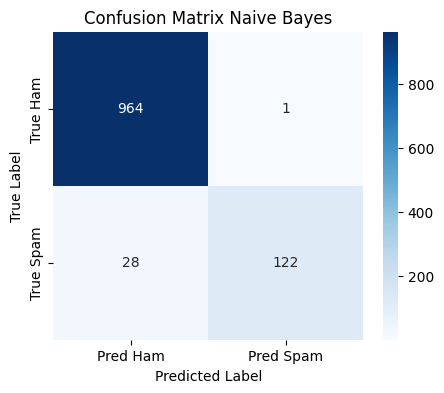

In [22]:
# 21. Evaluasi Model

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Ham', 'Pred Spam'], yticklabels=['True Ham', 'True Spam'])
plt.title("Confusion Matrix Naive Bayes")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
